In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [0]:
G = nx.read_gpickle('spotify_data.pickle')

In [0]:
F = nx.read_gpickle('spotify_data.pickle')

In [32]:
len(G.nodes())

8447

In [0]:
# Count number of artist that share a genre.

genres_ = ['house', 'pop', 'hip hop', 'rap', 'classical', 'rock', 'tech', 'indie', 'edm', 'step', 'elec']
remove_nodes = set()

temp_dict = {}

for node in G.nodes(data = True):
    try:
        if len(node[1]['genres']) > 0 and G.degree(node[0]) > 1:
            for c in genres_:
                for d in node[1]['genres']:
                    if c in d:
                        if c not in temp_dict.keys():
                            temp_dict[c] = 1   
                        else:
                            temp_dict[c] += 1
        else:
            remove_nodes.add(node[0])
        
        if len(temp_dict) == 0:
            remove_nodes.add(node[0])
        
        node[1]['genres'] = sorted(temp_dict.items(), key=lambda x:x[1], reverse = True)[0][0] 

        temp_dict = {}

    except:
        remove_nodes.add(node[0])

In [0]:
# Count number of artist that share a genre.

# genres_ = ['house', 'pop', 'hip hop', 'rap', 'classical', 'rock', 'tech', 'indie', 'metal', 'edm', 'step', 'jazz', 'elec']
# remove_nodes = set()
# count_dup = 0
# count_list = []
# temp_dict = {}

# for node in G.nodes(data = True):
#     try:
#         if len(node[1]['genres']) > 0 and G.degree(node[0]) > 1:
#             for c in genres_:
#                 for d in node[1]['genres']:
#                     if c in d:
#                         if c not in temp_dict.keys():
#                             temp_dict[c] = 1   
#                         else:
#                             temp_dict[c] += 1
#             None
#         else:
#             remove_nodes.add(node[0])
        
#         if len(temp_dict) == 0:
#             remove_nodes.add(node[0])

#         node[1]['genres'] = temp_dict
        
# #         Now we will try and count those with multiple genres of the same weight.
        
#         for key, value in temp_dict.items():
#             count_list.append(int(value))
        
#         count_list.sort()
#         if len(count_list) > 1:
#             if count_list[0] == count_list[1]:
#                 count_dup += 1

#         temp_dict = {}
#         count_list = []

#     except:
#         remove_nodes.add(node[0])

In [0]:
#Remove low nodes and count genres.

# Count number of artist that share a genre.

# remove_nodes = set()

# for count, node in enumerate(G.nodes(data = True)):
#     try:
#         if len(node[1]['genres']) > 0 and G.degree(node[0]) > 1:
#             nx.set_node_attributes(G, len(node[1]['genres']), 'count')
#         else:
#             remove_nodes.add(node[0])
#     except:
#         remove_nodes.add(node[0])

In [0]:
#Multi genre code.

# genres_ = ['house', 'pop', 'hip hop', 'rap', 'classical', 'rock', 'tech', 'indie', 'metal', 'edm', 'step', 'jazz', 'elec']
# temp_set = set()
# remove_nodes = set()

# for node in G.nodes(data = True):
#     try:
#         if len(node[1]['genres']) > 0 and G.degree(node[0]) > 1:
#             for c in genres_:
#                 for d in node[1]['genres']:
#                     if c in d:
#                         temp_set.add(c)
#         else:
#             remove_nodes.add(node[0])
        
#         if len(temp_set) == 0:
#             remove_nodes.add(node[0])
                
#         node[1]['genres'] = temp_set
#         temp_set = set()

#     except:
#         remove_nodes.add(node[0])

In [0]:
#Remove nodes

for r in remove_nodes:
    G.remove_node(r)

In [0]:
#Creates a dictionary of the amount of artist with a unique overlapping genre.

# genre_combo = {}

# for node in G.nodes(data = True):
#     if len(node[1]['genres']) > 1:
#         if str(node[1]['genres']) not in genre_combo.keys():
#             genre_combo[str(node[1]['genres'])] = 1
#         else:
#             genre_combo[str(node[1]['genres'])] += 1

In [0]:
#counts the amount of artist with overlapping genres.

# count = 0

# for key, value in genre_combo.items():
#     count += int(value)

In [0]:
#Count of genres

genres_count = {'house':0, 'pop':0, 'hip hop':0, 'rap':0, 'classical':0, 'rock':0, 'tech':0, 'indie':0, 'metal':0, 'edm':0, 'step':0, 'jazz':0, 'elec':0}
for d in G.nodes(data =True):
    genres_count[d[1]['genres']] += 1

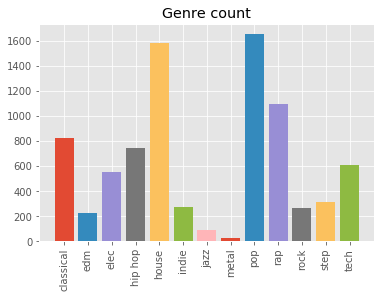

In [95]:
genres_count_sorted = sorted(genres_count.items(), key = lambda x:x[0])

plt.style.use('ggplot')
plt.xticks(rotation='vertical')
plt.title('Genre count')
label_ = []

for j in genres_count_sorted:
    plt.bar(j[0], height = j[1])
    label_.append(j[1])
    
# plt.legend(label_)
 

In [0]:
def plt_sorted(nx_list, number = 20, title = 'Title', hue = 'blue'):
    names = []
    values = []
    for g in nx_list[:number]:
        names.append(F.nodes[g[0]]['name'])
        values.append(float(g[1]))
        
    plt.bar(names, height = values, color = hue)
    plt.xticks(rotation='vertical')
    plt.title(title)
    return plt.show()  

In [0]:
G_degree = nx.degree_centrality(G)
G_degree_sorted = sorted(G_degree.items(), key=lambda x:x[1], reverse = True) 

In [0]:
G_closeness = nx.closeness_centrality(G)
G_closeness_sorted = sorted(G_closeness.items(), key=lambda x:x[1], reverse = True) 

In [0]:
G_betweennes = nx.betweenness_centrality(G)
G_betweennes_sorted = sorted(G_betweennes.items(), key=lambda x:x[1], reverse = True) 

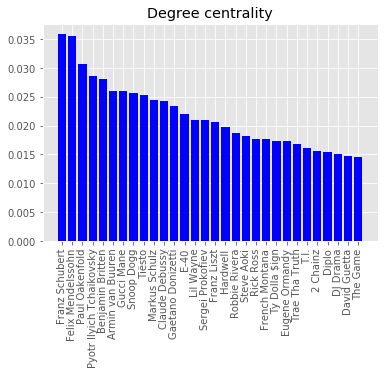

In [0]:
plt_sorted(G_degree_sorted, 30, 'Degree centrality')

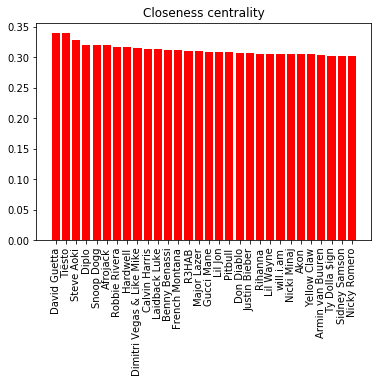

In [0]:
plt_sorted(G_closeness_sorted, 30, 'Closeness centrality', 'red')

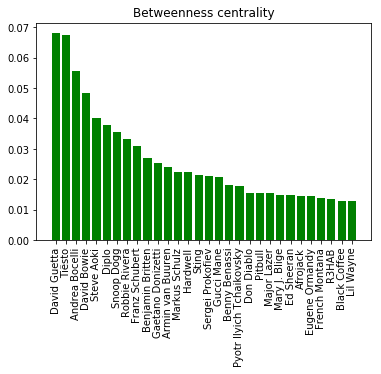

In [0]:
plt_sorted(G_betweennes_sorted, 30, 'Betweenness centrality', 'green')

Full graph

In [0]:
# F_degree = nx.degree_centrality(F)
# F_degree_sorted = sorted(F_degree.items(), key=lambda x:x[1], reverse = True) 

In [0]:
# F_closeness = nx.closeness_centrality(F)
# F_closeness_sorted = sorted(F_closeness.items(), key=lambda x:x[1], reverse = True) 

In [0]:
# F_betweennes = nx.betweenness_centrality(F)
# F_betweennes_sorted = sorted(F_betweennes.items(), key=lambda x:x[1], reverse = True) 

# Plot populariy vs a centrality measuraes.

In [0]:
genres = ['house', 'pop', 'hip hop', 'rap', 'classical', 'rock', 'tech', 'indie', 'edm', 'step', 'elec']

In [0]:
def prune_network(graph_object, min_degree = 1):
    """
    Given graph prunes nodes with less than given degree
    """
    nodes_to_prune = set()
    for node in graph_object.nodes(data = True):
        this_node_genre = ''
        current_genre_dict = dict()
        try:
            if (graph_object.degree(node[0]) <= min_degree) or len(node[1]['genres']) == 0:
                nodes_to_prune.add(node[0])
            else:
                for genre_in_node in node[1]['genres']:
                    for chosen_genre in genres:
                        if chosen_genre in genre_in_node:
                            current_genre_dict[chosen_genre] = current_genre_dict.get(chosen_genre, 0) + 1
                sorted_x = sorted(current_genre_dict.items(), key = lambda kv: kv[1])
                if len(sorted_x) > 0:
                    node[1]['genres'] = sorted_x[::-1][0][0]
                if len(current_genre_dict) == 0:
                    nodes_to_prune.add(node[0])
        except KeyError:
            nodes_to_prune.add(node[0])
    
    for node in nodes_to_prune:
        graph_object.remove_node(node)

    # additionally remove all nodes that have zero degree after this pruning
    zero_deg_nodes = []
    for node in graph_object.nodes():
        if graph_object.degree(node) == 0:
            zero_deg_nodes.append(node)

    for node in zero_deg_nodes:
        graph_object.remove_node(node)

    return graph_object

In [0]:
G = prune_network(G)

In [0]:
# G_degree = nx.degree_centrality(G)
# nx.set_node_attributes(G, G_degree, 'Degree')

In [0]:
# G_closeness = nx.closeness_centrality(G)
# nx.set_node_attributes(G, G_degree, 'Closeness')

In [0]:
# G_betweennes = nx.betweenness_centrality(G)
# nx.set_node_attributes(G, G_degree, 'Betweenness')

In [0]:
Graph_dict = {}

for node_ in G.nodes(data = True):
    Graph_dict[node_[1]['name']] = [float(node_[1]['popularity']), float(node_[1]['Degree']), float(node_[1]['Closeness']), float(node_[1]['Betweenness'])]

In [0]:
# Graph_dict_sorted = sorted(Graph_dict.items(), key=lambda x:x[1], reverse = True) 

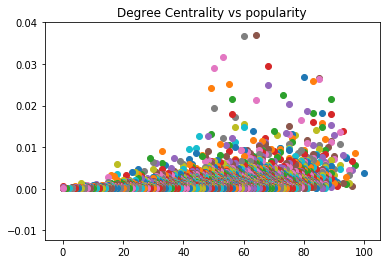

In [0]:
for i in range(len(Graph_dict_sorted)):
    plt.scatter(Graph_dict_sorted[i][1][0], Graph_dict_sorted[i][1][1])
    plt.title('Degree Centrality vs popularity')

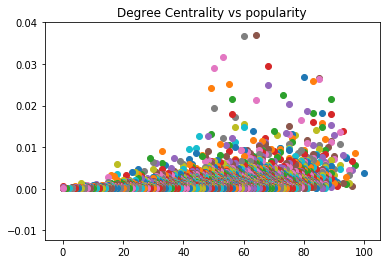

In [0]:
for i in range(len(Graph_dict_sorted)):
    plt.scatter(Graph_dict_sorted[i][1][0], Graph_dict_sorted[i][1][3])
    plt.title('Degree Centrality vs Betweenness')

Check correlation

In [0]:
#Correlation popularity : degree
list1 = [] 
list2 = []
for i in range(len(Graph_dict_sorted)):
    list1.append(Graph_dict_sorted[i][1][0])
    list2.append(Graph_dict_sorted[i][1][1])

np.corrcoef(list1, list2)[0, 1]

0.32609318671267606

In [0]:
#Correlation popularity : Closeness
list1 = [] 
list2 = []
for i in range(len(Graph_dict_sorted)):
    list1.append(Graph_dict_sorted[i][1][0])
    list2.append(Graph_dict_sorted[i][1][2])

np.corrcoef(list1, list2)[0, 1]

0.32609318671267606

In [0]:
#Correlation popularity : Betweenness
list1 = [] 
list2 = []
for i in range(len(Graph_dict_sorted)):
    list1.append(Graph_dict_sorted[i][1][0])
    list2.append(Graph_dict_sorted[i][1][3])

np.corrcoef(list1, list2)[0, 1]

0.32609318671267606

In [0]:
# nx.write_gpickle(G, 'count_network.pickle')

#Community

In [0]:
import community
import networkx as nx
from networkx.algorithms import community
from networkx.algorithms.community import greedy_modularity_communities
from sklearn.metrics.cluster import normalized_mutual_info_score
import numpy as np
import random

In [0]:
G = nx.read_gpickle('Network_centrality.pickle')

In [0]:
genres_ = ['house', 'pop', 'hip hop', 'rap', 'classical', 'rock', 'tech', 'indie', 'metal', 'edm', 'step', 'jazz', 'elec']

#label_propagation_communities

In [0]:
label_propagation = list(community.label_propagation_communities(G))

In [0]:
pred_values_label = []

for count, i in enumerate(label_propagation):
    for a in i:
        pred_values_label.append(count)

In [0]:
true_value_label = []

for count, i in enumerate(label_propagation):
    for a in i:
        true_value_label.append(genres_.index(G.nodes[a]['genres']))

In [141]:
label_propagation[0]

{'spotify:artist:2fVW2ix4ANKiofDZIsy1XR',
 'spotify:artist:6SsTlCsuCYleNza6xGwynu'}

In [110]:
normalized_mutual_info_score(true_value_label, pred_values_label, average_method='arithmetic')

0.35679889097244705

#greedy_modularity_communities

In [0]:
greedy_modularity = list(greedy_modularity_communities(G))

In [0]:
pred_values_greedy = []

for count, i in enumerate(greedy_modularity):
    for a in i:
        pred_values_greedy.append(count)

In [0]:
true_value_greedy = []

for count, i in enumerate(greedy_modularity):
    for a in i:
        true_value_greedy.append(genres_.index(G.nodes[a]['genres']))
    

In [154]:
len(greedy_modularity)

43

In [115]:
normalized_mutual_info_score(true_value_greedy, pred_values_greedy, average_method='arithmetic')

0.3221593935602934

(array([1138.,  322.,  497.,  297.,   59.,   73.,  119.,   19.,   15.,
          11.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

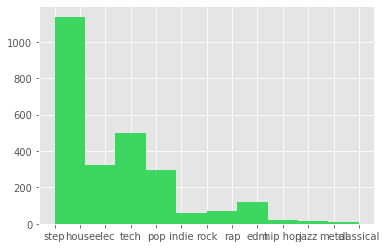

In [139]:
# for count, i in enumerate(greedy_modularity):
#     print(count)
#     plt.hist([G.nodes[a]['genres'] for a in i])
#     for a in i:
#         plt.hist(G.nodes[a]['genres'])

# [2550, 1951, 1220, 902, 408, 374, 246, 223, 135, 54, 48]
plt.hist([G.nodes[a]['genres'] for a in greedy_modularity[0]], color = colour_generator())

In [0]:
# #All scores
# popularity_list = []
# popularity_comm = dict()

# for count, i in enumerate(greedy_modularity):
#     for a in i:
#         popularity_list.append(G.nodes[a]['popularity'])
        
#         if count in popularity_comm.keys():
#             popularity_comm[count].append(G.nodes[a]['popularity'])
#         else:
#             popularity_comm[count] = [G.nodes[a]['popularity']]        

In [0]:
# from matplotlib import pyplot as mp
# import numpy as np

# legend_list = []

# def gaussian(x, mu, sig):
#     return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


# def plot_dis(list_data):
    
#     list_data.sort()
    
#     mean = np.mean(list_data)
#     sd = np.std(list_data)
    
#     for mu, sig in [(mean, sd)]:
#         mp.plot(list_data, gaussian(list_data, mu, sig))
    
#     return None

# plot_dis(popularity_list)
# legend_list.append(len(popularity_list))

# for key, value in popularity_comm.items():
#     if len(value) > 60:
#         plot_dis(value)
#         legend_list.append(len(value))
        
# mp.legend(legend_list) 
# mp.show()

In [0]:
# #Plot community clusters. Nodes degree vs popularity and color is the community.
# from mpl_toolkits.mplot3d import Axes3D

def colour_generator():
    return (random.random(), random.random(), random.random())
x, y, color_ = [], [], []

# for key, value in popularity_comm.items():
# #     color_ = colour_generator()
# #     mp.scatter(np.median(value), key, color = color_)
#     x.append(np.mean(value))
#     y.append(len(value))
#     color_.append(colour_generator())
    
# mp.plot(x, y, marker='o', linestyle='--', color = 'r', label='Square')
# #     for i in value:
# #         if len(value) > 60:
# #             mp.scatter(G.nodes[i]['popularity'], G.degree[i],  color = color_)

# # ax.set_xlabel('popularity')
# # ax.set_ylabel('degree')

# mp.show()  

In [0]:
#Convert genrees to a probability.



#girvan_newman

In [0]:
# girvan = community.girvan_newman(G)

In [0]:
# pred_values_girvan = []

# for count, i in enumerate(girvan):
#     for a in i:
#         pred_values_girvan.append(count)

In [0]:
# true_value_girvan = []

# for count, i in enumerate(girvan):
#     for a in i:
#         true_value_girvan.append(genres_.index(G.nodes[a]['genres']))
    

In [0]:
# normalized_mutual_info_score(true_value_girvan, pred_values_girvan, average_method='arithmetic')

1.0

#kclique

In [0]:
# k_cli = list(community.k_clique_communities(G, 10))

In [0]:
# pred_values_k_cli = []

# for count, i in enumerate(k_cli):
#     for a in i:
#         pred_values_k_cli.append(count)

In [0]:
# true_value_k_cli = []

# for count, i in enumerate(k_cli):
#     for a in i:
#         true_value_k_cli.append(genres_.index(G.nodes[a]['genres']))
    

In [0]:
# normalized_mutual_info_score(true_value_k_cli, pred_values_k_cli, average_method='arithmetic')

In [0]:
# #Show genres in the communaties. 
# for counter, i in enumerate(c):
#     i = list(i)
#     g_dict = dict()

#     for a in i:
#         n = G.nodes[a]['genres']
#         if n in g_dict:
#             g_dict[n] += 1
#         else:
#             g_dict[n] = 1   

#     print(counter)
#     print(sorted(g_dict.items(), key=lambda kv: kv[1], reverse=True))